# MNIST Classification with LeNet-5 Architecture

LeNet-5 was created in 1998 by Yann Lacun, and was pioneering in its time for the performace.  As the -5 in the name suggests, the architecture consists of 5 hidden layers; 3 convolutional layers and 2 fully connected layers.  Two other differences are that it uses tanh as an activation function and average pooling, which have largely been replaced by ReLU and max pooling in current architectures.  Although nearly 25 years old, it may be of interest to others studying neural networks due to its historical significance.

This notebook implements the LeNet-5 architecture on the MNIST dataset using Keras.  Portions of the code in this notebook are adapted from the notebook [here](https://github.com/moelgendy/deep_learning_for_vision_systems/blob/master/chapter_05/lenet_implementation_in_keras.ipynb). 

The original paper is [here](http://yann.lecun.com/exdb/publis/pdf/lecun-01a.pdf)

## Imports

In [1]:
import numpy as np 
import pandas as pd 
pd.set_option('display.max_columns', 50)

import matplotlib.pyplot as plt 
import plotly.express as px
import seaborn as sns
sns.set_style('darkgrid')

import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, AveragePooling2D, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator

import warnings
warnings.filterwarnings("ignore")

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

## Load Data and Top Level EDA

In [2]:
root_dir = '/kaggle/input/digit-recognizer'
train = pd.read_csv(root_dir + '/train.csv') 
test = pd.read_csv(root_dir + '/test.csv') 
ss = pd.read_csv(root_dir + '/sample_submission.csv')

In [3]:
print(f'Training Data Shape: {train.shape}') 
display(train.head()) 
print(f'Test Data Shape: {test.shape}') 
display(test.head()) 
print(f'Sample Submission Shape: {ss.shape}') 
display(ss.head())

Training Data Shape: (42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,...,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Test Data Shape: (28000, 784)


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,...,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Sample Submission Shape: (28000, 2)


,ImageId,Label
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [4]:
y = train['label']
train = train.iloc[:, 1:]

In [5]:
y.value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

## Reshape array for CNN

In [6]:
# -1 means that it is an unknown dimension and numpy should figure it out from other dimensions.
train = train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)
test.shape

(28000, 28, 28, 1)

## One hot encode y variable

In [7]:
# one hot encode y variable.
y_ohe = tf.keras.utils.to_categorical(y, num_classes=10)
y_ohe.shape

(42000, 10)

## Look at a few samples

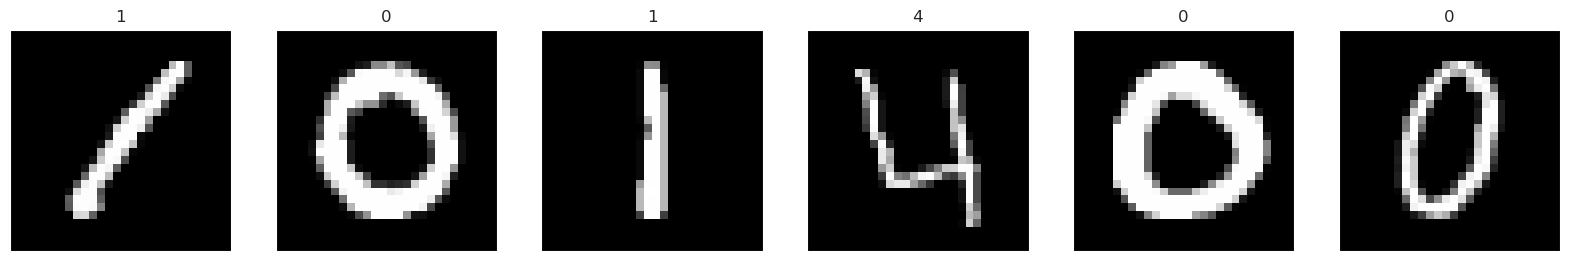

In [8]:
# plot first six training images
fig = plt.figure(figsize=(20,20))
for i in range(6):
    ax = fig.add_subplot(1, 6, i+1, xticks=[], yticks=[])
    ax.imshow(train[i], cmap='gray')
    ax.set_title(str(y[i]))

## Train Test Split

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(train, y_ohe, train_size=0.8, test_size=0.2,
                                                      random_state=12)
x_test = test

## LeNet-5 Model

In [10]:
# LeNet-5 Architecture
model = Sequential()

model.add(Conv2D(filters=6,kernel_size=5, strides=1,activation='tanh',input_shape=(28,28,1),padding='same'))

model.add(AveragePooling2D(pool_size=2, strides=2,padding='valid'))

model.add(Conv2D(filters=16,kernel_size=5, strides=1,activation='tanh',padding='valid'))

model.add(AveragePooling2D(pool_size=2, strides=2,padding='valid'))

model.add(Conv2D(filters=120,kernel_size=5, strides=1,activation='tanh',padding='valid'))

model.add(Flatten())

model.add(Dense(units=84, activation='tanh'))

model.add(Dense(units=10,activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d (AverageP  (None, 14, 14, 6)        0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_1 (Averag  (None, 5, 5, 16)         0         
 ePooling2D)                                                     
                                                                 
 conv2d_2 (Conv2D)           (None, 1, 1, 120)         48120     
                                                                 
 flatten (Flatten)           (None, 120)               0

In [11]:
# use categorical cross entropy loss function when have multiple classes
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [12]:
from keras.callbacks import ModelCheckpoint, LearningRateScheduler

# set the learning rate decay as utilized in the original 1998 paper: 
#    .00005 for the first 2 layers 
#    .0002 for the next 3
#    .000005 for the next 4
#    .000001 for the rest

def lr_schedule(epoch):
    if epoch <= 2:     
        lr = 5e-4
    elif epoch > 2 and epoch <= 5:
        lr = 2e-4
    elif epoch > 5 and epoch <= 9:
        lr = 5e-5
    else: 
        lr = 1e-5
    return lr

lr_scheduler = LearningRateScheduler(lr_schedule)
checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose=1, 
                               save_best_only=True)

# train the model
hist = model.fit(x_train, y_train, batch_size=32, epochs=20,
          validation_data=(x_valid, y_valid), callbacks=[checkpointer, lr_scheduler], 
          verbose=2, shuffle=True)

Epoch 1/20

Epoch 1: val_loss improved from inf to 0.09302, saving model to model.weights.best.hdf5
1050/1050 - 17s - loss: 0.2225 - accuracy: 0.9384 - val_loss: 0.0930 - val_accuracy: 0.9733 - lr: 5.0000e-04 - 17s/epoch - 16ms/step
Epoch 2/20

Epoch 2: val_loss improved from 0.09302 to 0.06906, saving model to model.weights.best.hdf5
1050/1050 - 16s - loss: 0.0805 - accuracy: 0.9758 - val_loss: 0.0691 - val_accuracy: 0.9795 - lr: 5.0000e-04 - 16s/epoch - 15ms/step
Epoch 3/20

Epoch 3: val_loss improved from 0.06906 to 0.06260, saving model to model.weights.best.hdf5
1050/1050 - 17s - loss: 0.0605 - accuracy: 0.9814 - val_loss: 0.0626 - val_accuracy: 0.9812 - lr: 5.0000e-04 - 17s/epoch - 16ms/step
Epoch 4/20

Epoch 4: val_loss improved from 0.06260 to 0.05034, saving model to model.weights.best.hdf5
1050/1050 - 16s - loss: 0.0412 - accuracy: 0.9872 - val_loss: 0.0503 - val_accuracy: 0.9839 - lr: 2.0000e-04 - 16s/epoch - 15ms/step
Epoch 5/20

Epoch 5: val_loss did not improve from 0.050

In [13]:
# load the best weights
model.load_weights('model.weights.best.hdf5')

## Calculate accuracy on the validation set

In [14]:
# evaluate test accuracy
score = model.evaluate(x_valid, y_valid, verbose=0)
accuracy = 100*score[1]

# print test accuracy
print('Validation accuracy: %.4f%%' % accuracy)


Validation accuracy: 98.7738%


## Evaluate the model

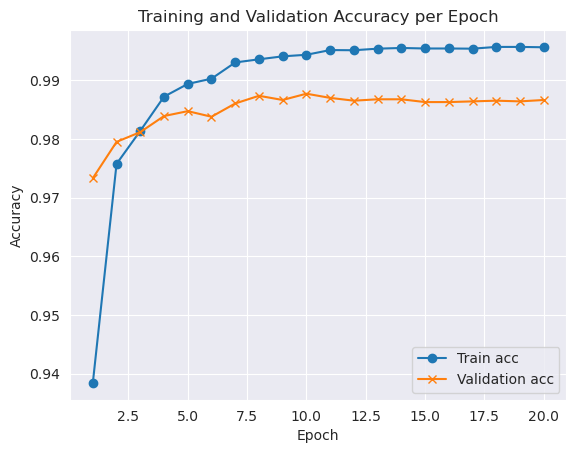

In [15]:
# plot train and validation accuracy per epoch
f, ax = plt.subplots()
ax.plot([None] + hist.history['accuracy'], 'o-')
ax.plot([None] + hist.history['val_accuracy'], 'x-')
# Plot legend and use the best location automatically: loc = 0.
ax.legend(['Train acc', 'Validation acc'], loc = 0)
ax.set_title('Training and Validation Accuracy per Epoch')
ax.set_xlabel('Epoch')
ax.set_ylabel('Accuracy')
plt.show()

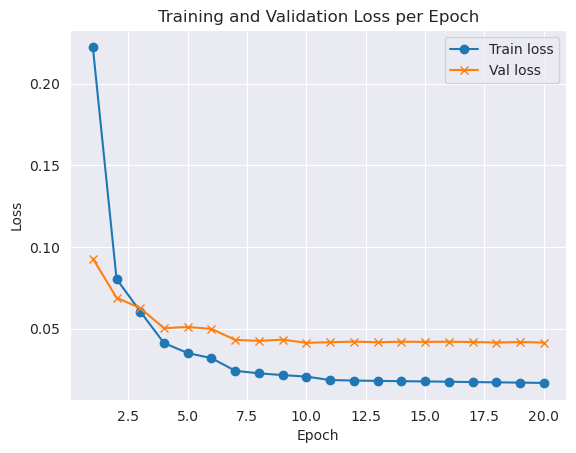

In [16]:
# plot train and validation loss per epoch
f, ax = plt.subplots()
ax.plot([None] + hist.history['loss'], 'o-')
ax.plot([None] + hist.history['val_loss'], 'x-')

# Plot legend and use the best location automatically: loc = 0.
ax.legend(['Train loss', "Val loss"], loc = 0)
ax.set_title('Training and Validation Loss per Epoch')
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')
plt.show()

## Predict on test set and submit 

In [17]:
y_preds = model.predict(x_test)

875/875 [==============================] - 6s 7ms/step


In [18]:
# argmax is used to get max values.
preds = []
for i in range(len(y_preds)):
    preds.append(np.argmax(y_preds[i]))

In [19]:
ss.Label = preds
ss.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3


In [20]:
ss.to_csv('submission.csv',index=False)

<b>The LeNet-5 architecture scores 98.8% validation accuracy.